# **Machine Learning** _Day 102_
##### Name: Muhammad Hassaan
##### Date: August 14, 2024
##### Email: muhammadhassaan7896@gmail.com

---

# **Principal Component Analysis (PCA) with Python**

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much variance as possible. It transforms data into a new coordinate system where the greatest variances are captured by the first few principal components.

In [10]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA 
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Example 1 

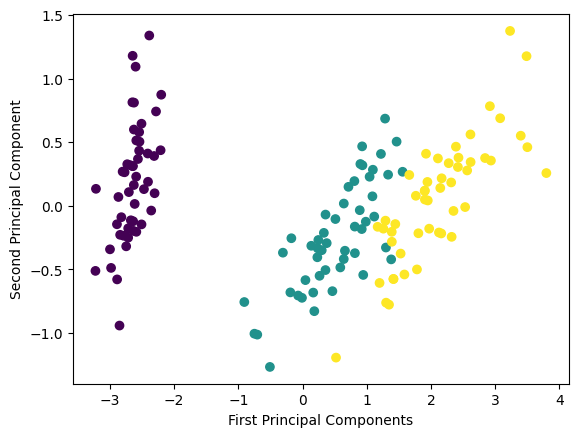

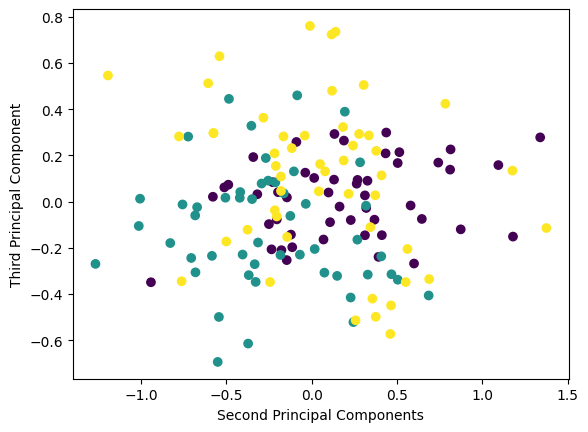

In [11]:
# load iris 
iris = load_iris()

# reduce the data to 2 dimensions
pca = PCA(n_components=3)

# fit and transform the data 
iris_pca = pca.fit_transform(iris.data)

# plot the first two principal components
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=iris.target)
plt.xlabel('First Principal Components')
plt.ylabel('Second Principal Component')
plt.show()

# now we plot the 2 and 3 principal components 
plt.scatter(iris_pca[:,1], iris_pca[:,2], c=iris.target)
plt.xlabel('Second Principal Components')
plt.ylabel('Third Principal Component')
plt.show()

### Example 2

In [12]:
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# scale the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'Total variance explained: {np.sum(explained_variance)}')

Explained variance by each component: [0.72962445 0.22850762]
Total variance explained: 0.9581320720000166


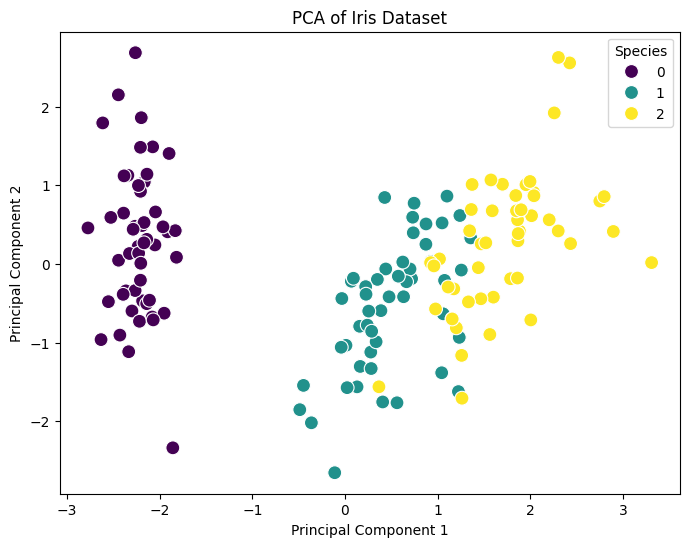

In [13]:
# Create a DataFrame for visualization
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=df_pca, palette='viridis', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()

## **Do PCA on Tips Dataset**

Explained variance by each component: [0.32678897 0.24500246 0.14669421 0.12743089 0.07037688 0.04445825
 0.03924835]
Total variance explained: 1.0


C:\Users\muham\AppData\Local\Temp\ipykernel_14732\177087518.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


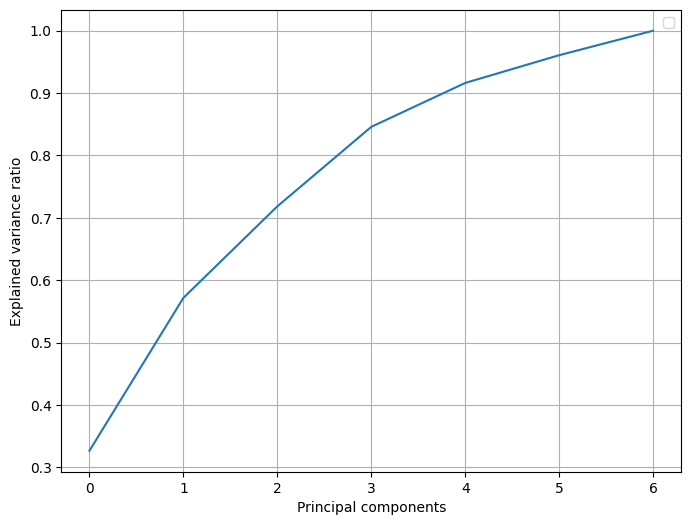

                 PC1       PC2       PC3       PC4       PC5       PC6  \
total_bill  0.577289  0.133642  0.164816  0.061756 -0.058183  0.378659   
tip         0.531650  0.178333  0.159316 -0.010375 -0.637807 -0.274214   
sex         0.189111 -0.152571 -0.588523  0.762364  0.000506 -0.115541   
smoker      0.036649 -0.335732  0.724260  0.501763  0.212334  0.111732   
day        -0.156579  0.660434 -0.047053  0.229846  0.003218  0.606759   
time       -0.281249  0.556479  0.266919  0.297170 -0.004329 -0.572115   
size        0.493317  0.261729 -0.055523 -0.148236  0.738039 -0.245190   

                 PC7  
total_bill  0.686390  
tip        -0.421978  
sex         0.007162  
smoker     -0.228151  
day        -0.340735  
time        0.352618  
size       -0.241370  


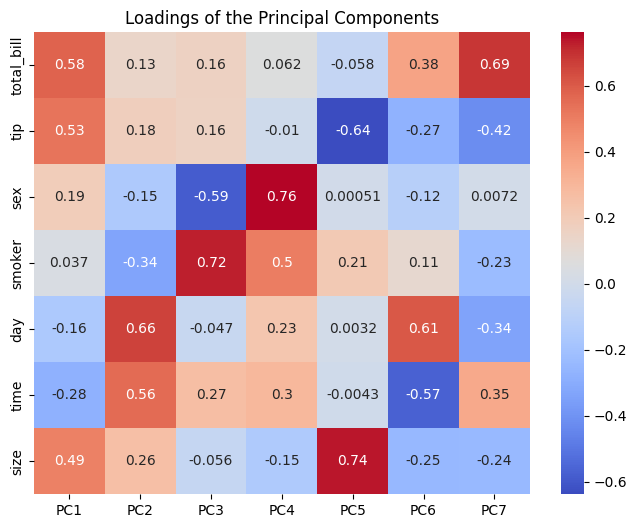

In [22]:
# load the data 
tips = sns.load_dataset('tips')

# Preprocessing 
## encode categorical data 
le = LabelEncoder()

cat_features = tips.select_dtypes(include='category').columns

# write a for loop
for col in cat_features:
    tips[col] = le.fit_transform(tips[col])

# standardize he data 
scaler = StandardScaler()
tips_scaled = scaler.fit_transform(tips)

# Apply PCA
pca = PCA()  # Reducing to 2 components for visualization
tips_pca = pca.fit_transform(tips_scaled)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'Total variance explained: {np.sum(explained_variance)}')

# plot the variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.grid(True)
plt.show()

# create a dataframe to show the loadings 
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=tips.columns)
print(loadings)

# plot the loadings
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('Loadings of the Principal Components')
plt.show()

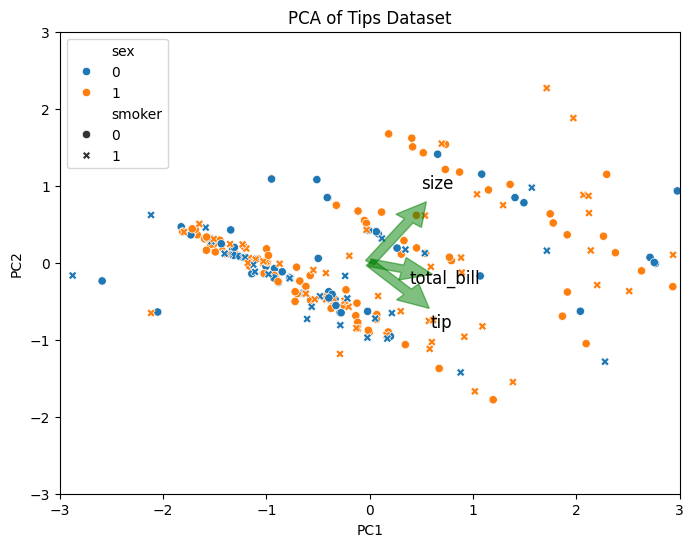

In [27]:
# prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]

# standardize the data
X = (X -X.mean()) / X.std()

# apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# transform the data into teh principal component space 
X_pca = pca.transform(X)

# add the principal components to the dataset
tips['PC1'] = X_pca[:, 0]
tips['PC2'] = X_pca[:, 1]

# plot the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='sex', data=tips, style='smoker')
plt.title('PCA of Tips Dataset')

# add arrows indicating the dorection and strength od eaxh original feature in the prinicpal component space
features = pca.components_.T

for i, feature in enumerate(features):
    plt.arrow(0, 0, feature[0], feature[1], color='green', alpha=0.5, width=0.1,
              length_includes_head=True, head_width=0.3, head_length=0.3)
    plt.text(feature[0]*1.2, feature[1]*1.3, X.columns[i], color='black', ha='center', va='center', fontsize=12)

# set the axis limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# show the plot
plt.show()

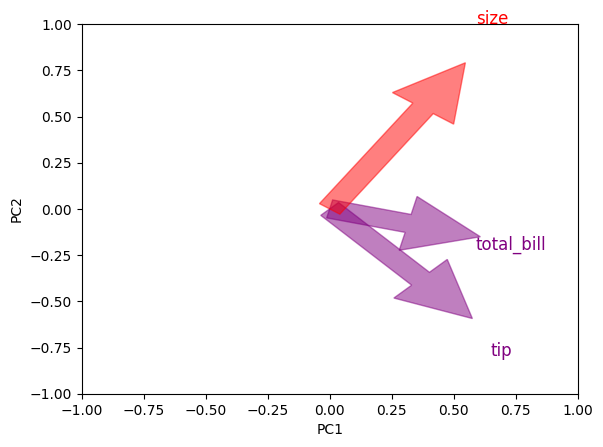

In [34]:
# prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]

# standardize the data
X = (X -X.mean()) / X.std()

# apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit(X)

# add arrows indicating the dorection and strength od eaxh original feature in the prinicpal component space
features = pca.components_.T
for i, feature in enumerate(features):
    x,y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, feature[0], feature[1], color=color, alpha=0.5, width=0.1,
              length_includes_head=True, head_width=0.3, head_length=0.3)
    plt.text(feature[0]*1.2, feature[1]*1.3, X.columns[i], color=color, ha='center', va='center', fontsize=12)

# set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# show the plot
plt.show() 

---
## **Conclusion**

* Summary of PCA: PCA helps in reducing the dimensionality of data while preserving its variance. The transformed data in principal components can be used for further analysis or as input for machine learning algorithms.
  
* Applications: PCA is commonly used in exploratory data analysis and pre-processing for machine learning.

---